In [1]:
import numpy as np
import seaborn as sb
import pandas as pd

In [2]:
df = sb.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [5]:
X = df.drop(['species'],axis=1)

In [6]:
Y = df.species

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
#adding Bias
X['B']=1

In [9]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,B
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [10]:
from sklearn.neural_network import MLPRegressor

In [11]:
mlp = MLPRegressor(solver='lbfgs',activation='logistic',learning_rate_init=0.00001, alpha=1e-5, 
                   hidden_layer_sizes=(5,1,5),max_iter=1000000,random_state=111)

Train the network (fit)

In [12]:
mlp.fit(X,X)
predictions = mlp.predict(X)

In [13]:
X.iloc[1]

sepal_length    4.9
sepal_width     3.0
petal_length    1.4
petal_width     0.2
B               1.0
Name: 1, dtype: float64

In [14]:
predictions[1]

array([4.73999638, 3.07618225, 1.44303085, 0.17833639, 1.0004184 ])

In [15]:
print(len(mlp.coefs_))
for i in mlp.coefs_:
    print (i.shape)

4
(5, 5)
(5, 1)
(1, 5)
(5, 5)


In [16]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Encode

In [17]:
samp = X.values[0]

In [18]:
samp

array([5.1, 3.5, 1.4, 0.2, 1. ])

In [19]:
l1 = sigmoid(np.dot(samp,mlp.coefs_[0])+mlp.intercepts_[0])
l2 = sigmoid(np.dot(l1,mlp.coefs_[1])+mlp.intercepts_[1])
l2[0]

0.04833450882104276

In [20]:
l2

array([0.04833451])

# Decode

In [21]:
l3 = sigmoid(np.dot(l2,mlp.coefs_[2])+mlp.intercepts_[2])
l4 = np.dot(l3,mlp.coefs_[3])+mlp.intercepts_[3]
l4

array([5.09380016, 3.54710521, 1.45595706, 0.2490054 , 1.00031323])

In [22]:
def encode(mlp,samp):
    l1 = sigmoid(np.dot(samp,mlp.coefs_[0])+mlp.intercepts_[0])
    l2 = sigmoid(np.dot(l1,mlp.coefs_[1])+mlp.intercepts_[1])
    return l2[0]

In [23]:
df['cls']=0
for k,v in df.iterrows():
    df.loc[k,'cls'] = encode(mlp,np.array([v.sepal_length , v.sepal_width,v.petal_length,v.petal_width,1]))

In [24]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cls
0,5.1,3.5,1.4,0.2,setosa,0.048335
1,4.9,3.0,1.4,0.2,setosa,0.077885
2,4.7,3.2,1.3,0.2,setosa,0.071790
3,4.6,3.1,1.5,0.2,setosa,0.081436
4,5.0,3.6,1.4,0.2,setosa,0.046654


In [25]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cls
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.056892
versicolor,5.936,2.770,4.260,1.326,0.358990
virginica,6.588,2.974,5.552,2.026,0.508146


In [26]:
df.iloc[90:110]

,sepal_length,sepal_width,petal_length,petal_width,species,cls
90,5.5,2.6,4.4,1.2,versicolor,0.338837
91,6.1,3.0,4.6,1.4,versicolor,0.383173
92,5.8,2.6,4.0,1.2,versicolor,0.337256
93,5.0,2.3,3.3,1.0,versicolor,0.282937
94,5.6,2.7,4.2,1.3,versicolor,0.341252
95,5.7,3.0,4.2,1.2,versicolor,0.346670
96,5.7,2.9,4.2,1.3,versicolor,0.350336
97,6.2,2.9,4.3,1.3,versicolor,0.368626
98,5.1,2.5,3.0,1.1,versicolor,0.277104
99,5.7,2.8,4.1,1.3,versicolor,0.344637


In [27]:
################################################################
# calculate mse of predictions (output of the NN) vs. X for:
# (2,1,2)
# (5,1,5)
# (10,1,10)
# (15,1,15)
# (20,1,20)
# (25,1,25)

In [28]:
X

,sepal_length,sepal_width,petal_length,petal_width,B
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [29]:
import numpy as np
X_ = X.iloc[:, :4].values
X_[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [30]:
pred_ = predictions[:, :4]
pred_[:3]

array([[5.09380016, 3.54710521, 1.45595706, 0.2490054 ],
       [4.73999638, 3.07618225, 1.44303085, 0.17833639],
       [4.8038786 , 3.16422415, 1.44059487, 0.18934358]])

In [31]:
d_ = (X_ - pred_)
d_[:3]

array([[ 0.00619984, -0.04710521, -0.05595706, -0.0490054 ],
       [ 0.16000362, -0.07618225, -0.04303085,  0.02166361],
       [-0.1038786 ,  0.03577585, -0.14059487,  0.01065642]])

In [32]:
d_ = d_**2
d_[:3]

array([[3.84380126e-05, 2.21890107e-03, 3.13119274e-03, 2.40152889e-03],
       [2.56011571e-02, 5.80373454e-03, 1.85165411e-03, 4.69311804e-04],
       [1.07907626e-02, 1.27991158e-03, 1.97669167e-02, 1.13559353e-04]])

In [33]:
m_ = np.mean(d_, axis=1)
m_[:4]

array([0.00194752, 0.00843146, 0.00798779, 0.00500634])

In [34]:
err_ = np.mean(m_)
err_

0.04353270138528518

In [35]:
mlp1 = MLPRegressor(solver='lbfgs',activation='logistic',learning_rate_init=0.00001, alpha=1e-5, 
                   hidden_layer_sizes=(2,1,2),max_iter=1000000,random_state=111)
mlp1.fit(X,X)
pred1 = mlp1.predict(X)
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse1 = mean_squared_error(pred1, X)
print('Mean-Square Error (MSE): %.4f' % lin_mse1)

Mean-Square Error (MSE): 0.2066


In [36]:
mlp2 = MLPRegressor(solver='lbfgs',activation='logistic',learning_rate_init=0.00001, alpha=1e-5, 
                   hidden_layer_sizes=(5,1,5),max_iter=1000000,random_state=111)
mlp2.fit(X,X)
pred2 = mlp2.predict(X)
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse2 = mean_squared_error(pred2, X)
print('Mean-Square Error (MSE): %.4f' % lin_mse2)

Mean-Square Error (MSE): 0.0348


In [37]:
mlp3 = MLPRegressor(solver='lbfgs',activation='logistic',learning_rate_init=0.00001, alpha=1e-5, 
                   hidden_layer_sizes=(10,1,10),max_iter=1000000,random_state=111)
mlp3.fit(X,X)
pred3 = mlp3.predict(X)
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse3 = mean_squared_error(pred3, X)
print('Mean-Square Error (MSE): %.4f' % lin_mse3)

Mean-Square Error (MSE): 0.0510


In [38]:
mlp4 = MLPRegressor(solver='lbfgs',activation='logistic',learning_rate_init=0.00001, alpha=1e-5, 
                   hidden_layer_sizes=(15,1,15),max_iter=1000000,random_state=111)
mlp4.fit(X,X)
pred4 = mlp4.predict(X)
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse4 = mean_squared_error(pred4, X)
print('Mean-Square Error (MSE): %.4f' % lin_mse4)

Mean-Square Error (MSE): 0.0345


In [39]:
mlp5 = MLPRegressor(solver='lbfgs',activation='logistic',learning_rate_init=0.00001, alpha=1e-5, 
                   hidden_layer_sizes=(20,1,20),max_iter=1000000,random_state=111)
mlp5.fit(X,X)
pred5 = mlp5.predict(X)
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse5 = mean_squared_error(pred5, X)
print('Mean-Square Error (MSE): %.4f' % lin_mse5)

Mean-Square Error (MSE): 0.0511


In [40]:
mlp6 = MLPRegressor(solver='lbfgs',activation='logistic',learning_rate_init=0.00001, alpha=1e-5, 
                   hidden_layer_sizes=(25,1,25),max_iter=1000000,random_state=111)
mlp6.fit(X,X)
pred6 = mlp6.predict(X)
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse6 = mean_squared_error(pred6, X)
print('Mean-Square Error (MSE): %.4f' % lin_mse6)

Mean-Square Error (MSE): 0.0508


In [41]:
#########################################
# feature reduction (4->1)
# print confusion matrix and accuracy score using 4 feature (original and using 1 feature (cls)).
#      split to 33% test, seed = 47
#      use RF() and LogReg()
#      try for all the five NN architectures

## 1. LogReg() and RF() using 4 features

In [42]:
X2 = df.loc[:, df.columns != 'species']
y = df.loc[:, df.columns == 'species']

In [43]:
type(X2)

pandas.core.frame.DataFrame

In [44]:
type(y)

pandas.core.frame.DataFrame

In [45]:
y=np.where(y =='setosa', 0, y)
y=np.where(y =='versicolor', 1, y)
y=np.where(y =='virginica', 2, y)

In [46]:
y = pd.DataFrame(y)
y = y.astype('int')

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.33, random_state=47)
logreg = LogisticRegression(random_state=47)
logreg.fit(X_train, y_train)
y_log_4 = logreg.predict(X_test)
acc_log_4 = logreg.score(X_test, y_test)
print('Accuracy of Logistic Regression classifier on test set y_log_4: {:.4f}'.format(acc_log_4))
confusion_matrix1 = confusion_matrix(y_test, y_log_4)
print(confusion_matrix1)
rf = RandomForestClassifier(random_state=47)
rf.fit(X_train, y_train)
y_rf_4 = rf.predict(X_test)
acc_rf_4 = rf.score(X_test, y_test)
print('Accuracy of Random Forest classifier on test set y_gb_4: {:.4f}'.format(acc_rf_4))
confusion_matrix2 = confusion_matrix(y_test, y_rf_4)
print(confusion_matrix2)

Accuracy of Logistic Regression classifier on test set y_log_4: 0.9800
[[20  0  0]
 [ 0  9  0]
 [ 0  1 20]]
Accuracy of Random Forest classifier on test set y_gb_4: 0.9600
[[20  0  0]
 [ 0  9  0]
 [ 0  2 19]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


## 2. LogReg() and RF() using 1 feature (cls) (2,1,2)

In [49]:
X3 = df.drop(['species'],axis=1)
X3['B']=1

In [50]:
X3['cls1']=0
for k,v in X2.iterrows():
    X3.loc[k,'cls1'] = encode(mlp1,np.array([v.sepal_length , v.sepal_width,v.petal_length,v.petal_width,1]))
X3['cls2']=0
for k,v in X2.iterrows():
    X3.loc[k,'cls2'] = encode(mlp2,np.array([v.sepal_length , v.sepal_width,v.petal_length,v.petal_width,1]))
X3['cls3']=0
for k,v in X2.iterrows():
    X3.loc[k,'cls3'] = encode(mlp3,np.array([v.sepal_length , v.sepal_width,v.petal_length,v.petal_width,1]))
X3['cls4']=0
for k,v in X2.iterrows():
    X3.loc[k,'cls4'] = encode(mlp4,np.array([v.sepal_length , v.sepal_width,v.petal_length,v.petal_width,1]))
X3['cls5']=0
for k,v in X2.iterrows():
    X3.loc[k,'cls5'] = encode(mlp5,np.array([v.sepal_length , v.sepal_width,v.petal_length,v.petal_width,1]))
X3['cls6']=0
for k,v in X2.iterrows():
    X3.loc[k,'cls6'] = encode(mlp6,np.array([v.sepal_length , v.sepal_width,v.petal_length,v.petal_width,1]))

In [51]:
X3.head()

,sepal_length,sepal_width,petal_length,petal_width,cls,B,cls1,cls2,cls3,cls4,cls5,cls6
0,5.1,3.5,1.4,0.2,0.048335,1,0.000021,0.048335,6.293450e-09,0.080788,0.006858,9.440770e-34
1,4.9,3.0,1.4,0.2,0.077885,1,0.000021,0.077885,6.325430e-09,0.107492,0.017227,2.073627e-33
2,4.7,3.2,1.3,0.2,0.071790,1,0.000021,0.071790,5.875674e-09,0.106785,0.003707,7.082877e-34
3,4.6,3.1,1.5,0.2,0.081436,1,0.000021,0.081436,6.344351e-09,0.113787,0.015906,2.559366e-33
4,5.0,3.6,1.4,0.2,0.046654,1,0.000021,0.046654,6.195255e-09,0.081248,0.003641,6.977517e-34


In [52]:
X4 = X3.loc[:, X3.columns == 'cls1']
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.33, random_state=47)
logreg = LogisticRegression(random_state=47)
logreg.fit(X_train, y_train)
y_log_11 = logreg.predict(X_test)
acc_log_11 = logreg.score(X_test, y_test)
print('Accuracy of Logistic Regression classifier on test set y_log_11: {:.4f}'.format(acc_log_11))
confusion_matrix1 = confusion_matrix(y_test, y_log_11)
print(confusion_matrix1)
rf = RandomForestClassifier(random_state=47)
rf.fit(X_train, y_train)
y_rf_11 = rf.predict(X_test)
acc_rf_11 = rf.score(X_test, y_test)
print('Accuracy of Random Forest classifier on test set y_rf_11: {:.4f}'.format(acc_rf_11))
confusion_matrix2 = confusion_matrix(y_test, y_rf_11)
print(confusion_matrix2)

Accuracy of Logistic Regression classifier on test set y_log_11: 0.5800
[[20  0  0]
 [ 0  9  0]
 [ 0 21  0]]
Accuracy of Random Forest classifier on test set y_rf_11: 0.5800
[[20  0  0]
 [ 0  9  0]
 [ 0 21  0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


## 3. LogReg() and RF() using 1 feature (cls) (5,1,5)

In [53]:
X5 = X3.loc[:, X3.columns == 'cls2']
X_train, X_test, y_train, y_test = train_test_split(X5, y, test_size=0.33, random_state=47)
logreg = LogisticRegression(random_state=47)
logreg.fit(X_train, y_train)
y_log_12 = logreg.predict(X_test)
acc_log_12 = logreg.score(X_test, y_test)
print('Accuracy of Logistic Regression classifier on test set y_log_12: {:.4f}'.format(acc_log_12))
confusion_matrix1 = confusion_matrix(y_test, y_log_12)
print(confusion_matrix1)
rf = RandomForestClassifier(random_state=47)
rf.fit(X_train, y_train)
y_rf_12 = rf.predict(X_test)
acc_rf_12 = rf.score(X_test, y_test)
print('Accuracy of Random Forest classifier on test set y_rf_12: {:.4f}'.format(acc_rf_12))
confusion_matrix2 = confusion_matrix(y_test, y_rf_12)
print(confusion_matrix2)

Accuracy of Logistic Regression classifier on test set y_log_12: 0.7400
[[20  0  0]
 [ 0  9  0]
 [ 0 13  8]]
Accuracy of Random Forest classifier on test set y_rf_12: 0.9200
[[20  0  0]
 [ 0  8  1]
 [ 0  3 18]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


## 4. LogReg() and RF() using 1 feature (cls) (10,1,10)

In [54]:
X6 = X3.loc[:, X3.columns == 'cls3']
X_train, X_test, y_train, y_test = train_test_split(X6, y, test_size=0.33, random_state=47)
logreg = LogisticRegression(random_state=47)
logreg.fit(X_train, y_train)
y_log_13 = logreg.predict(X_test)
acc_log_13 = logreg.score(X_test, y_test)
print('Accuracy of Logistic Regression classifier on test set y_log_13: {:.4f}'.format(acc_log_13))
confusion_matrix1 = confusion_matrix(y_test, y_log_13)
print(confusion_matrix1)
rf = RandomForestClassifier(random_state=47)
rf.fit(X_train, y_train)
y_rf_13 = rf.predict(X_test)
acc_rf_13 = rf.score(X_test, y_test)
print('Accuracy of Random Forest classifier on test set y_rf_13: {:.4f}'.format(acc_rf_13))
confusion_matrix2 = confusion_matrix(y_test, y_rf_13)
print(confusion_matrix2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Accuracy of Logistic Regression classifier on test set y_log_13: 0.5800
[[20  0  0]
 [ 0  9  0]
 [ 0 21  0]]
Accuracy of Random Forest classifier on test set y_rf_13: 0.8800
[[20  0  0]
 [ 0  7  2]
 [ 0  4 17]]


## 5. LogReg() and RF() using 1 feature (cls) (15,1,15)

In [55]:
X7 = X3.loc[:, X3.columns == 'cls4']
X_train, X_test, y_train, y_test = train_test_split(X7, y, test_size=0.33, random_state=47)
logreg = LogisticRegression(random_state=47)
logreg.fit(X_train, y_train)
y_log_14 = logreg.predict(X_test)
acc_log_14 = logreg.score(X_test, y_test)
print('Accuracy of Logistic Regression classifier on test set y_log_14: {:.4f}'.format(acc_log_14))
confusion_matrix1 = confusion_matrix(y_test, y_log_14)
print(confusion_matrix1)
rf = RandomForestClassifier(random_state=47)
rf.fit(X_train, y_train)
y_rf_14 = rf.predict(X_test)
acc_rf_14 = rf.score(X_test, y_test)
print('Accuracy of Random Forest classifier on test set y_rf_14: {:.4f}'.format(acc_rf_14))
confusion_matrix2 = confusion_matrix(y_test, y_rf_14)
print(confusion_matrix2)

Accuracy of Logistic Regression classifier on test set y_log_14: 0.5800
[[20  0  0]
 [ 0  9  0]
 [ 0 21  0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Accuracy of Random Forest classifier on test set y_rf_14: 0.8600
[[20  0  0]
 [ 0  6  3]
 [ 0  4 17]]


## 6. LogReg() and RF() using 1 feature (cls) (20,1,20)

In [56]:
X8 = X3.loc[:, X3.columns == 'cls5']
X_train, X_test, y_train, y_test = train_test_split(X8, y, test_size=0.33, random_state=47)
logreg = LogisticRegression(random_state=47)
logreg.fit(X_train, y_train)
y_log_15 = logreg.predict(X_test)
acc_log_15 = logreg.score(X_test, y_test)
print('Accuracy of Logistic Regression classifier on test set y_log_15: {:.4f}'.format(acc_log_15))
confusion_matrix1 = confusion_matrix(y_test, y_log_15)
print(confusion_matrix1)
rf = RandomForestClassifier(random_state=47)
rf.fit(X_train, y_train)
y_rf_15 = rf.predict(X_test)
acc_rf_15 = rf.score(X_test, y_test)
print('Accuracy of Random Forest classifier on test set y_rf_15: {:.4f}'.format(acc_rf_15))
confusion_matrix2 = confusion_matrix(y_test, y_rf_15)
print(confusion_matrix2)

Accuracy of Logistic Regression classifier on test set y_log_15: 0.8000
[[20  0  0]
 [ 0  9  0]
 [ 0 10 11]]
Accuracy of Random Forest classifier on test set y_rf_15: 0.9000
[[20  0  0]
 [ 0  8  1]
 [ 0  4 17]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


## 7. LogReg() and RF() using 1 feature (cls) (25,1,25)

In [57]:
X9 = X3.loc[:, X3.columns == 'cls6']
X_train, X_test, y_train, y_test = train_test_split(X9, y, test_size=0.33, random_state=47)
logreg = LogisticRegression(random_state=47)
logreg.fit(X_train, y_train)
y_log_16 = logreg.predict(X_test)
acc_log_16 = logreg.score(X_test, y_test)
print('Accuracy of Logistic Regression classifier on test set y_log_16: {:.4f}'.format(acc_log_16))
confusion_matrix1 = confusion_matrix(y_test, y_log_16)
print(confusion_matrix1)
rf = RandomForestClassifier(random_state=47)
rf.fit(X_train, y_train)
y_rf_16 = rf.predict(X_test)
acc_rf_16 = rf.score(X_test, y_test)
print('Accuracy of Random Forest classifier on test set y_rf_16: {:.4f}'.format(acc_rf_16))
confusion_matrix2 = confusion_matrix(y_test, y_rf_16)
print(confusion_matrix2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Accuracy of Logistic Regression classifier on test set y_log_16: 0.8400
[[20  0  0]
 [ 0  9  0]
 [ 0  8 13]]
Accuracy of Random Forest classifier on test set y_rf_16: 0.9000
[[20  0  0]
 [ 0  8  1]
 [ 0  4 17]]


## Compare Models Performance

In [58]:
models = ['4 features LoReg','4 features RF','cls(2,1,2) LoReg', 'cls(2,1,2) RF',
          'cls(5,1,5) LoReg', 'cls(5,1,5) RF', 'cls(10,1,10) LoReg', 'cls(10,1,10) RF',
          'cls(15,1,15) LoReg', 'cls(15,1,15) RF','cls(20,1,20) LoReg', 'cls(20,1,20) RF',
          'cls(25,1,25) LoReg', 'cls(25,1,25) RF']
tests_accuracy = [acc_log_4, acc_rf_4, acc_log_11, acc_rf_11, 
                  acc_log_12, acc_rf_12, acc_log_13, acc_rf_13,
                  acc_log_14, acc_rf_14, acc_log_15, acc_rf_15, 
                  acc_log_13, acc_rf_16]

In [59]:
compare_models = pd.DataFrame({ "Algorithms": models, "Tests Accuracy": tests_accuracy })
compare_models.sort_values(by = "Tests Accuracy", ascending = False)

,Algorithms,Tests Accuracy
0,4 features LoReg,0.98
1,4 features RF,0.96
5,"cls(5,1,5) RF",0.92
11,"cls(20,1,20) RF",0.90
13,"cls(25,1,25) RF",0.90
7,"cls(10,1,10) RF",0.88
9,"cls(15,1,15) RF",0.86
10,"cls(20,1,20) LoReg",0.80
4,"cls(5,1,5) LoReg",0.74
2,"cls(2,1,2) LoReg",0.58


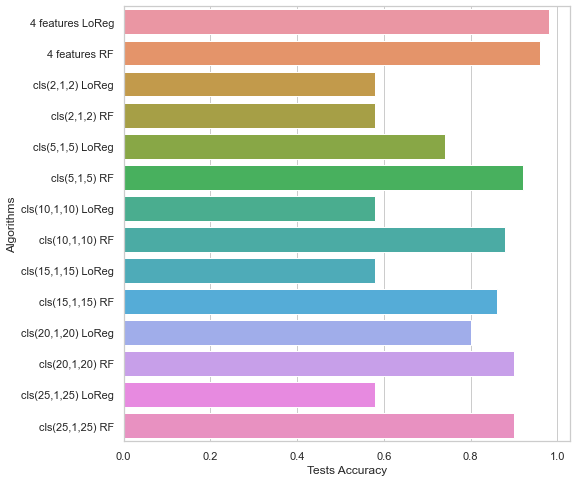

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(8,8))
sns.barplot(x = "Tests Accuracy", y = "Algorithms", data = compare_models)
plt.show()

## Conclusion

#### The 4 features Random Forest Classifier wins it all here with a maximum accuracy of 0.98.